In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import networkx as nx
from scipy.stats import pearsonr

# machine lerning
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor

# Budget Importance Analysis

In [2]:
#Load data
df = pd.read_csv('../Data/preprocessed_data/final_data/full_db.csv')

columns_to_keep = ['name', 'avg_budget_0','std_budget_0','avg_budget_1','std_budget_1','avg_budget_2','std_budget_2','success']
df = df[columns_to_keep]
full_df = df.rename(columns={'name': 'Name'})
full_df.sort_values(by=['success'], ascending=False)



,Name,avg_budget_0,std_budget_0,avg_budget_1,std_budget_1,avg_budget_2,std_budget_2,success
5185,Nicolas Cage,1.895170e+07,1.372983e+07,4.955597e+07,2.963674e+07,3.677003e+07,4.419293e+07,2.252450
2135,Leonardo DiCaprio,4.033317e+07,4.027526e+07,5.111410e+07,4.101362e+07,NaN,NaN,2.165815
5186,Tom Hanks,2.095120e+07,1.317438e+07,3.834273e+07,3.528570e+07,3.065853e+07,3.480187e+07,2.093282
6126,Gary Oldman,2.250652e+07,1.168132e+07,5.739779e+07,4.955617e+07,4.705855e+07,5.003266e+07,2.063533
2168,Scarlett Johansson,3.495454e+07,2.598018e+07,8.716231e+07,8.679505e+07,NaN,NaN,2.043450
...,...,...,...,...,...,...,...,...
2129,Ahney Her,7.100000e+07,1.041945e+08,NaN,NaN,NaN,NaN,0.311359
2131,Tara Macken,6.518333e+07,9.184045e+07,NaN,NaN,NaN,NaN,0.293505
2132,Harry Holland,7.500000e+07,7.305820e+07,NaN,NaN,NaN,NaN,0.244641
2133,Dale Pavinski,6.766667e+07,5.845986e+07,NaN,NaN,NaN,NaN,0.193497


In [3]:
avg_budget_beginning = full_df['avg_budget_0']
avg_budget_mid = full_df['avg_budget_1'].dropna()
avg_budget_end = full_df['avg_budget_2'].dropna()


std_budget_beginning = full_df['std_budget_0']
std_budget_mid = full_df['std_budget_1'].dropna()
std_budget_end = full_df['std_budget_2'].dropna()

success_beginning = full_df['success'] # Success of actors who had a begginning career (No NaN in avg_budget_0)
success_mid = full_df[~full_df['avg_budget_1'].isna()]['success'] # Success of actors who had a mid career (No NaN in avg_budget_1)
success_end = full_df[~full_df['avg_budget_2'].isna()]['success'] # Success of actors who had a end career (No NaN in avg_budget_2)

assert len(avg_budget_beginning) == len(std_budget_beginning) == len(success_beginning)
assert len(avg_budget_mid) == len(std_budget_mid) == len(success_mid)
assert len(avg_budget_end) == len(std_budget_end) == len(success_end)


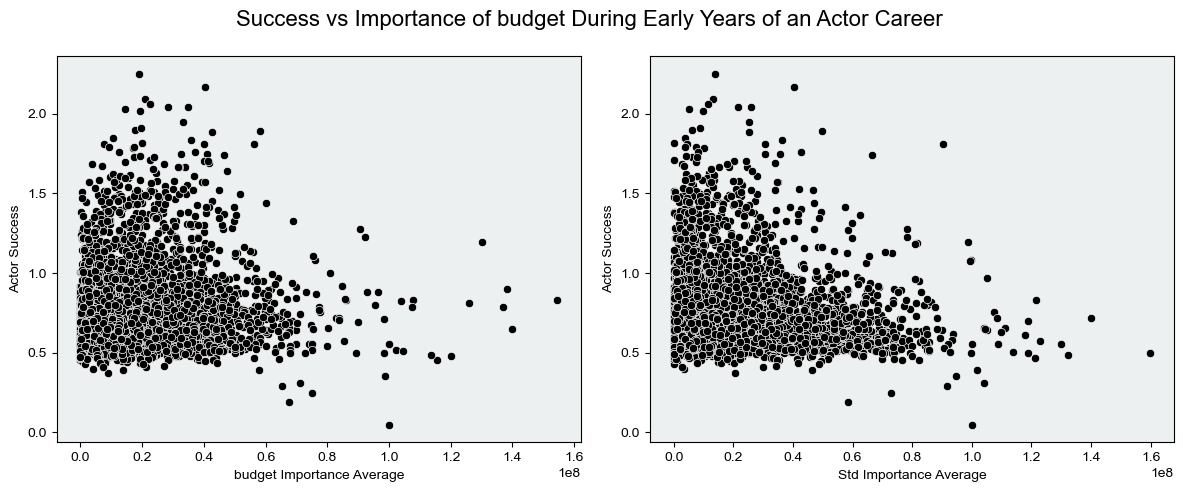

In [4]:
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Movie Budget During Early Years of an Actor Career ', fontsize=16)
# Flatten the 3 by 2 array of subplots into a 1D array for easier indexing
axes = axes.flatten()
sns.set_theme()
light_blue = '#ECF0F1'
light_green = '#D5F5E3'
light_yellow = '#FFFFE0'
# Set Seaborn style
sns.set(style="whitegrid")

# Plot 1: Success vs Role Average
sns.scatterplot(x=avg_budget_beginning, y=success_beginning, ax=axes[0],  color='black')
axes[0].set_xlabel('Movie Budget  Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_blue)


# Plot 2: Success vs budget Standard Deviation
sns.scatterplot(x=std_budget_beginning, y=success_beginning, ax=axes[1], color='black')
axes[1].set_xlabel('Std Movie Budget Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_blue)


plt.tight_layout()
plt.show()

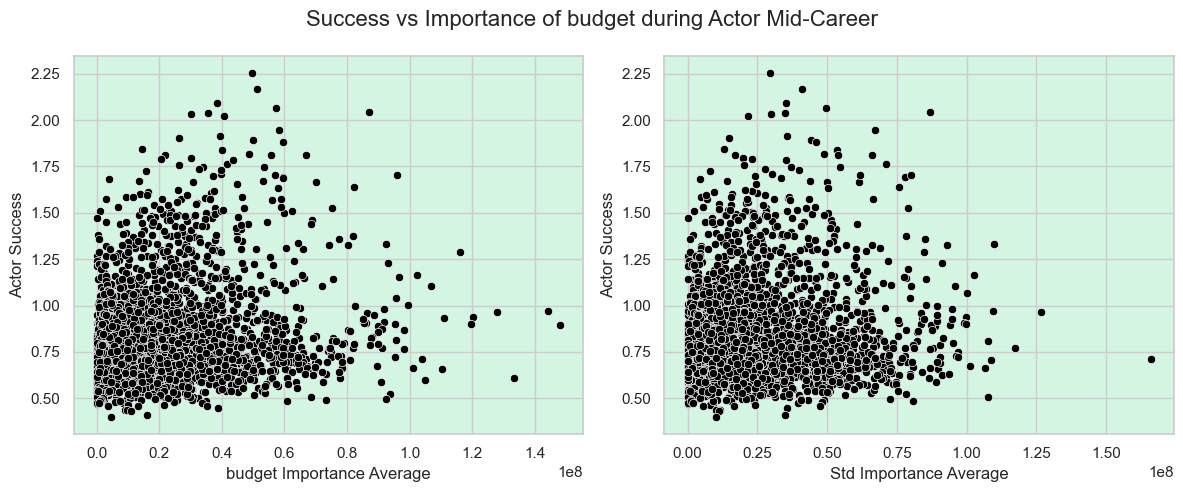

In [5]:
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Movie Budget during Actor Mid-Career', fontsize=16)
axes = axes.flatten()
sns.set_theme()
sns.set(style="whitegrid")

# Plot 1: Success vs budget Average
sns.scatterplot(x=avg_budget_mid, y=success_mid, ax=axes[0], color='black')
axes[0].set_xlabel('Movie Budget Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_green)

# Plot 2: Success vs budget Standard Deviation
sns.scatterplot(x=std_budget_mid, y=success_mid, ax=axes[1], color='black')
axes[1].set_xlabel('Std Movie Budget Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_green)

plt.tight_layout()
plt.show()


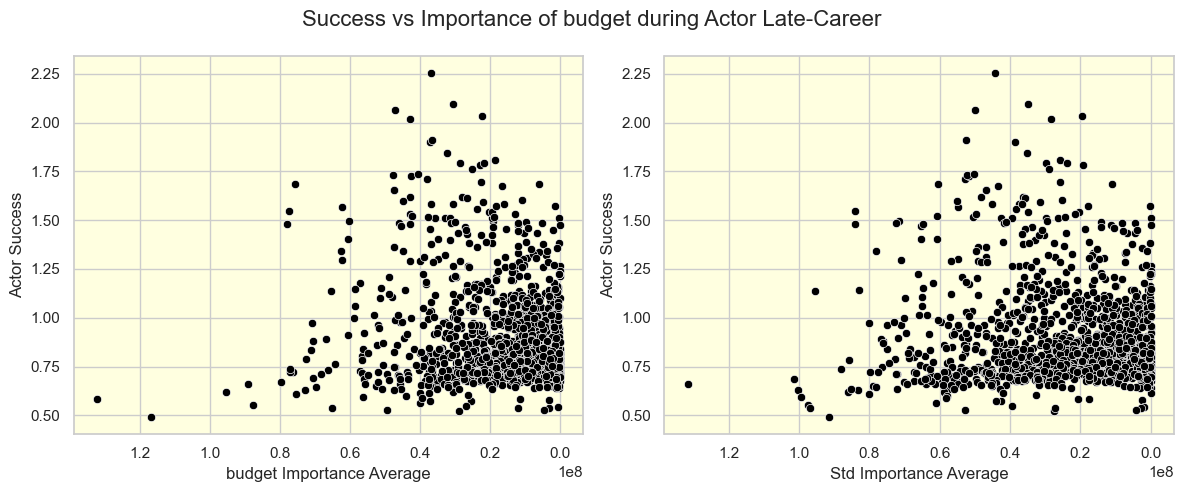

In [6]:

fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Movie Budget during Actor Late-Career', fontsize=16)
axes = axes.flatten()
sns.set_theme()
sns.set(style="whitegrid")

sns.scatterplot(x=avg_budget_end, y=success_end, ax=axes[0], color='black')
axes[0].set_xlabel('Movie Budget  Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_yellow)

# Plot 2: Success vs budget Standard Deviation
sns.scatterplot(x=std_budget_end, y=success_end, ax=axes[1], color='black')
axes[1].set_xlabel('Std Movie Budget Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_yellow)

# Flip the x-axis so that the highest average budget importance is on the left
axes[0].invert_xaxis()
axes[1].invert_xaxis()

plt.tight_layout()
plt.show()

## Hypothesis testing: Pearson Correlation

In [7]:
# budget importance Averages
cc_av=np.zeros(3)
p_av=np.zeros(3)
cc_av[0], p_av[0] = pearsonr(avg_budget_beginning, success_beginning) # Early Years
cc_av[1], p_av[1] = pearsonr(avg_budget_mid, success_mid) # Mid-Career
cc_av[2], p_av[2] = pearsonr(avg_budget_end, success_end) # Late-Career 

# budget Importance Standard deviation
cc_std=np.zeros(3)# Correlation Coefficient
p_std=np.zeros(3) # Pvalue
cc_std[0], p_std[0] = pearsonr(std_budget_beginning, success_beginning) # Early Years
cc_std[1], p_std[1] = pearsonr(std_budget_mid, success_mid) # Mid-Career
cc_std[2], p_std[2] = pearsonr(std_budget_end, success_end) # Late-Career 

print("p-value average:", p_av)
print("p-value standard deviation:", p_std)


p-value average: [2.25634242e-27 4.18771004e-56 2.33761646e-10]
p-value standard deviation: [1.32618968e-08 3.45566780e-29 8.63953506e-07]


## Regression Analysis: Gradient Boosting Regression

In [8]:
def numpy_helper(df, cols):
    new_array = df[cols].values.astype(float)
    return new_array

In [9]:
# instead of accuracy, precision and recall (more used for classification), use MSE (Mean Square Error) and R-squared

# average 
# X_1 stack actor1[common features, avg_0] , actor 2[common features, avg_0], actor 3[common features, avg_0]
# X_2 stack actor1[common features group 2, avg_1.dropna] , actor 2[common features, avg_1.dropna], actor 3[common features_group2, avg1.dropna]

# Early years- average budget
features_1= ['std_budget_0']
X_1= full_df[features_1] #all features except avg_0
y_1= full_df['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['std_budget_0', 'avg_budget_0'] #all features
X_2= full_df[features_2]
y_2= full_df['success']
model2= GradientBoostingRegressor()
results_model2 = cross_validate(model2, X_2, y_2, cv=3)

print('Prediction without average budget- early years:',results_model1 )
print('Prediction with average budget- early years:',results_model2 )

# Early years- std budget
features_1= ['avg_budget_0'] #all features except std_0
X_1= full_df[features_1]
y_1= full_df['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['std_budget_0', 'avg_budget_0'] #all features
X_2= full_df[features_2]
y_2= full_df['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_2, y_2, cv=3)

print('Prediction without std budget- early years:',results_model1 )
print('Prediction with std budget- early years:',results_model2 )

# Mid-Career- avg budget
df_filter=full_df.dropna(subset=['avg_budget_1']) # Remove actors who don't have film in Phase 2 of career (ie keep group 2 and 3)
features_1= ['avg_budget_0', 'std_budget_0', 'std_budget_1'] #all features except avg_1
X_1= df_filter[features_1]
y_1= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['std_budget_0', 'avg_budget_0', 'avg_budget_1', 'std_budget_1'] #all features
X_2= df_filter[features_2]
y_2= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_2, y_2, cv=3)

print('Prediction without avg budget- Mid years:',results_model1 )
print('Prediction with avg budget- Mid years:',results_model2 )

# Mid-Career- std budget
features_1= ['avg_budget_0', 'std_budget_0', 'avg_budget_1'] #all features except std_1
X_1= df_filter[features_1]
y_1= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['std_budget_0', 'avg_budget_0', 'avg_budget_1', 'std_budget_1'] #all features
X_2= df_filter[features_2]
y_2= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_2, y_2, cv=3)

print('Prediction without std budget- Mid years:',results_model1 )
print('Prediction with std budget- Mid years:',results_model2 )

# Late-Career- avg budget
df_filter=full_df.dropna(subset=['avg_budget_2','avg_budget_1']) # Remove actors who don't have movies in Phase 3 of career (i.e keep group 3 rows)
features_1= ['avg_budget_0', 'std_budget_0', 'avg_budget_1','std_budget_1', 'std_budget_2' ] # all features except avg_2
X_1= df_filter[features_1]
y_1= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['avg_budget_0', 'std_budget_0', 'avg_budget_1','std_budget_1', 'avg_budget_2','std_budget_2' ] #all features
X_2= df_filter[features_2]
y_2= df_filter['success']
model2= GradientBoostingRegressor()
results_model2 = cross_validate(model2, X_2, y_2, cv=3)

print('Prediction without avg budget- End years:',results_model1 )
print('Prediction with avg budget- End years:',results_model2 )

# Late-Career- std budget
features_1= ['avg_budget_0', 'std_budget_0', 'avg_budget_1','std_budget_1', 'avg_budget_2'] # all features except std_2
X_1= df_filter[features_1]
y_1= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['avg_budget_0', 'std_budget_0', 'avg_budget_1','std_budget_1', 'avg_budget_2','std_budget_2' ] #all features
X_2= df_filter[features_2]
y_2= df_filter['success']
model2= GradientBoostingRegressor()
results_model2 = cross_validate(model2, X_2, y_2, cv=3)

print('Prediction without std budget- End years:',results_model1 )
print('Prediction with std budget- End years:',results_model2 )





Prediction without average budget- early years: {'fit_time': array([0.14451408, 0.12548423, 0.12699223]), 'score_time': array([0.00215721, 0.00192189, 0.00163889]), 'test_score': array([-1.00228935, -0.42144392, -0.39208371])}
Prediction with average budget- early years: {'fit_time': array([0.22774887, 0.22426987, 0.22938681]), 'score_time': array([0.00236416, 0.002455  , 0.00218129]), 'test_score': array([-0.57171079, -0.35156665, -0.20517753])}
Prediction without std budget- early years: {'fit_time': array([0.22685575, 0.22378492, 0.22618103]), 'score_time': array([0.00238323, 0.00238013, 0.00191998]), 'test_score': array([-0.57964658, -0.351342  , -0.20567137])}
Prediction with std budget- early years: {'fit_time': array([0.22774887, 0.22426987, 0.22938681]), 'score_time': array([0.00236416, 0.002455  , 0.00218129]), 'test_score': array([-0.57171079, -0.35156665, -0.20517753])}
Prediction without avg budget- Mid years: {'fit_time': array([0.29206896, 0.30528593, 0.2967    ]), 'score